In [419]:
# Mubeen Quadrt
# SID: 801064313
# Homework 2
# 10/28/21
# Reference: LogisticReg.pdf

In [420]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [421]:
pwd

'C:\\Users\\mubee\\Desktop'

In [422]:
diabetes = pd.read_csv(r'C:\Users\mubee\OneDrive\Desktop\diabetes.csv')

In [423]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [424]:
diabetes.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [425]:
print(diabetes.head())
X = diabetes.iloc[:,[0,1,2,3,4,5,6,7]].values
Y = diabetes.iloc[:,[8]].values
X[0:10]

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [426]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print(X_train)

[[7.00e+00 1.50e+02 7.80e+01 ... 3.52e+01 6.92e-01 5.40e+01]
 [4.00e+00 9.70e+01 6.00e+01 ... 2.82e+01 4.43e-01 2.20e+01]
 [0.00e+00 1.65e+02 9.00e+01 ... 5.23e+01 4.27e-01 2.30e+01]
 ...
 [4.00e+00 9.40e+01 6.50e+01 ... 2.47e+01 1.48e-01 2.10e+01]
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [5.00e+00 1.36e+02 8.20e+01 ... 0.00e+00 6.40e-01 6.90e+01]]


In [427]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 0.90832902  0.91569367  0.44912368 ...  0.37852648  0.67740401
   1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103 ... -0.50667229 -0.07049698
  -0.96569189]
 [-1.12606292  1.38763205  1.06340683 ...  2.54094063 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.84620959 -0.21634972 ... -0.94927168 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.12937261  0.24436264 ... -0.26640405 -0.50001442
   0.11706589]
 [ 0.32707418  0.47521786  0.65388473 ... -4.07275877  0.52121586
   2.94889395]]


In [428]:
#Problem 1

"""
Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. 
Please use 80% and 20% split between training and evaluation (test). 
Make sure to perform proper scaling and standardization before your training.
"""

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [429]:
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [430]:
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(Y_test, Y_pred)
print(confusionmatrix)

[[98  9]
 [18 29]]


In [431]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted Label')

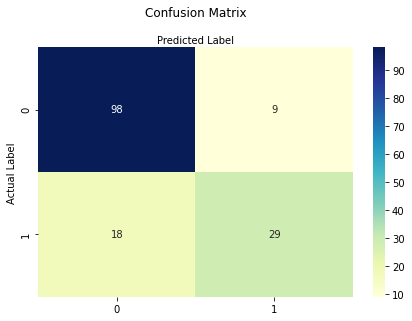

In [432]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cn_m), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [433]:
#Problem 2

"""
Using the diabetes dataset, build a Naïve Bays binary classifier for positive diabetes. 
Please use 80% and 20% split between training and evaluation (test). 
Make sure to perform proper scaling and standardization before your training.
"""

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [434]:
Y_pred = classifier.predict(X_test)

In [435]:
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[93 14]
 [18 29]]


In [436]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.7922077922077922
Precision: 0.6744186046511628
Recall: 0.6170212765957447


Text(0.5, 257.44, 'Predicted Label')

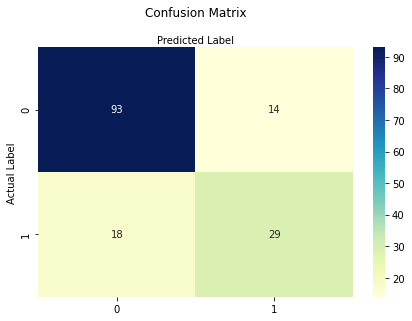

In [437]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cn_m2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


In [438]:
# Problem 3

"""
Repeat problem 1, and this time use K-fold cross-validation for your training and validation. 
Perform the training two times for K=5 and K=10. Analyze and compare your results against problem 1. 

"""

#K = 5
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'Accuracy' : make_scorer(accuracy_score), 
           'Precision' : make_scorer(precision_score),
           'Recall' : make_scorer(recall_score)}

final_scores = cross_validate(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)

print("For K equal to 5:")
print("Accuracy:",mean(final_scores['test_Accuracy'])) 
print("Precision:",mean(final_scores['test_Precision'])) 
print("Recall:",mean(final_scores['test_Recall']))

For K equal to 5:
Accuracy: 0.7578558696205755
Precision: 0.6709650864971336
Recall: 0.6013137121439008


In [439]:
#K = 10
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'Accuracy' : make_scorer(accuracy_score), 
           'Precision' : make_scorer(precision_score),
           'Recall' : make_scorer(recall_score)}

final_scores = cross_validate(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)

print("For K equal to 10:")
print("Accuracy:",mean(final_scores['test_Accuracy'])) 
print("Precision:",mean(final_scores['test_Precision'])) 
print("Recall:",mean(final_scores['test_Recall']))


For K equal to 10:
Accuracy: 0.7564764183185236
Precision: 0.6652269630530501
Recall: 0.600860189563338


In [440]:
#Problem 4

"""

Repeat problem 2, and this time use K-fold cross-validation for your training and validation. 


"""

#K = 5
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'Accuracy' : make_scorer(accuracy_score), 
           'Precision' : make_scorer(precision_score),
           'Recall' : make_scorer(recall_score)}

final_scores = cross_validate(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)

print("For K equal to 5:")
print("Accuracy:",mean(final_scores['test_Accuracy'])) 
print("Precision:",mean(final_scores['test_Precision'])) 
print("Recall:",mean(final_scores['test_Recall']))

For K equal to 5:
Accuracy: 0.7578558696205755
Precision: 0.6709650864971336
Recall: 0.6013137121439008


In [418]:
#K = 10
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'Accuracy' : make_scorer(accuracy_score), 
           'Precision' : make_scorer(precision_score),
           'Recall' : make_scorer(recall_score)}

final_scores = cross_validate(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)

print("For K equal to 10:")
print("Accuracy:",mean(final_scores['test_Accuracy'])) 
print("Precision:",mean(final_scores['test_Precision'])) 
print("Recall:",mean(final_scores['test_Recall']))

For K equal to 10:
Accuracy: 0.7564764183185236
Precision: 0.6652269630530501
Recall: 0.600860189563338
